In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, f_oneway
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
assesments          = 'Data/assessments.csv'
courses             = 'Data/courses.csv'
studentAssesment    = 'Data/studentAssessment.csv'
studentInfo         = 'Data/studentInfo.csv'
studentRegistration = 'Data/studentRegistration.csv'
studentVle          = 'Data/studentVle.csv'
vle                 = 'Data/vle.csv'

assessments_data         = pd.read_csv(assesments)
courses_data             = pd.read_csv(courses)
student_assessment_data   = pd.read_csv(studentAssesment)
student_info_data         = pd.read_csv(studentInfo)
student_registration_data = pd.read_csv(studentRegistration)
student_vle_data          = pd.read_csv(studentVle)
vle_data                 = pd.read_csv(vle)


# Student Registration & Courses
Menentukan modul yang paling banyak diikuti oleh mahasiswa berdasarkan jumlah pendaftaran.

In [8]:
# Merge the data based on common columns (code_module and code_presentation)
merged_data = pd.merge(student_registration_data, courses_data, on=['code_module', 'code_presentation'], how='inner')

In [9]:
merged_data

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length
0,AAA,2013J,11391,-159.0,NaN,268
1,AAA,2013J,28400,-53.0,NaN,268
2,AAA,2013J,30268,-92.0,12.0,268
3,AAA,2013J,31604,-52.0,NaN,268
4,AAA,2013J,32885,-176.0,NaN,268
...,...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN,269
32589,GGG,2014J,2645731,-23.0,NaN,269
32590,GGG,2014J,2648187,-129.0,NaN,269
32591,GGG,2014J,2679821,-49.0,101.0,269


In [10]:
merged_data.nunique()

code_module                       7
code_presentation                 4
id_student                    28785
date_registration               332
date_unregistration             416
module_presentation_length        7
dtype: int64

In [11]:
missing_data = merged_data.isnull().sum()
print("Data yang hilang atau tidak lengkap:")
print(missing_data)

Data yang hilang atau tidak lengkap:
code_module                       0
code_presentation                 0
id_student                        0
date_registration                45
date_unregistration           22521
module_presentation_length        0
dtype: int64


In [16]:
# Cek lagi data yang hilang 
missing_data_after_filling = merged_data.isnull().sum()
print("\nData yang hilang :")
print(missing_data_after_filling)


Data yang hilang :
code_module                   0
code_presentation             0
id_student                    0
date_registration             0
date_unregistration           0
module_presentation_length    0
dtype: int64


In [15]:
merged_data.dropna(subset=['date_registration', 'date_unregistration'], inplace=True)

In [20]:
# Hitung jumlah pendaftaran untuk setiap modul
jumlah_pendaftaran_per_modul = merged_data['code_module'].value_counts()

# Temukan modul dengan jumlah pendaftaran terbanyak
modul_terbanyak = jumlah_pendaftaran_per_modul.idxmax()
jumlah_pendaftaran_terbanyak = jumlah_pendaftaran_per_modul.max()

print("Modul dengan jumlah pendaftaran terbanyak:")
print("Kode Modul:", modul_terbanyak)
print("Jumlah Pendaftaran:", jumlah_pendaftaran_terbanyak)

Modul dengan jumlah pendaftaran terbanyak:
Kode Modul: FFF
Jumlah Pendaftaran: 2370


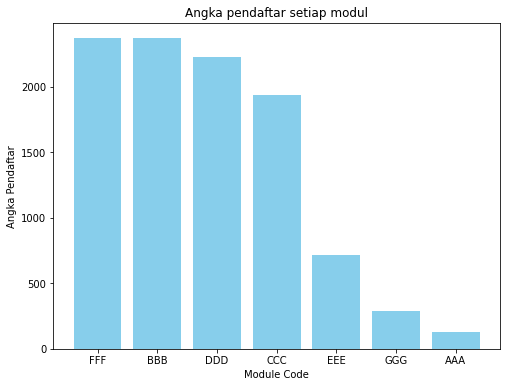

In [22]:
# Plotting the number of registrations per module
registration_counts = merged_data['code_module'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(registration_counts.index, registration_counts.values, color='skyblue')
plt.xlabel('Module Code')
plt.ylabel('Angka Pendaftar')
plt.title('Angka pendaftar setiap modul')
plt.show()

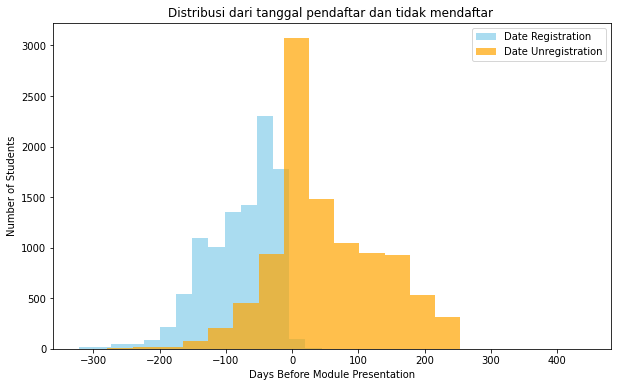

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(merged_data['date_registration'].dropna(), bins=20, alpha=0.7, label='Date Registration', color='skyblue')
plt.hist(merged_data['date_unregistration'].dropna(), bins=20, alpha=0.7, label='Date Unregistration', color='orange')
plt.xlabel('Days Before Module Presentation')
plt.ylabel('Number of Students')
plt.title('Distribusi dari tanggal pendaftar dan tidak mendaftar ')
plt.legend()
plt.show()

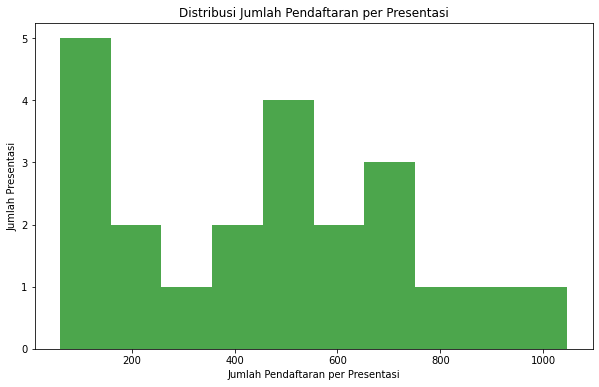

In [24]:
# Distribusi Jumlah Pendaftaran per Presentasi (Histogram)
plt.figure(figsize=(10, 6))
plt.hist(merged_data.groupby(['code_module', 'code_presentation'])['id_student'].count(), bins=10, alpha=0.7, color='green')
plt.xlabel('Jumlah Pendaftaran per Presentasi')
plt.ylabel('Jumlah Presentasi')
plt.title('Distribusi Jumlah Pendaftaran per Presentasi')
plt.show()


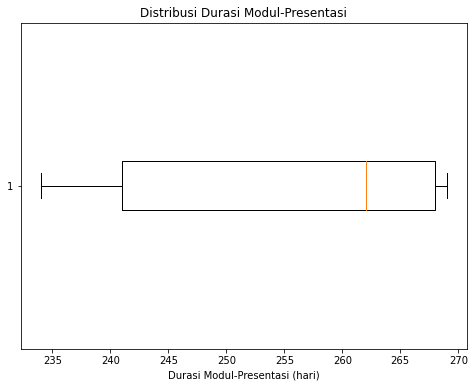

In [25]:
# Durasi Modul-Presentasi (Box Plot)
plt.figure(figsize=(8, 6))
plt.boxplot(merged_data['module_presentation_length'], vert=False)
plt.xlabel('Durasi Modul-Presentasi (hari)')
plt.title('Distribusi Durasi Modul-Presentasi')
plt.show()


# Assessment

## EDA

In [26]:
assessments_data.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [27]:
assessments_data.tail()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0
205,GGG,2014J,37444,Exam,229.0,100.0


In [28]:
assessments_data.isnull().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [29]:
assessments_data.duplicated().sum()

0

In [30]:
assessments_data.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [31]:
assessments_data.shape

(206, 6)

In [32]:
assessments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [33]:
assessments_data.dtypes

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

In [34]:
assessments_data.nunique()

code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
date                  74
weight                24
dtype: int64

## Pre Processing

mengisi null value dengan nilai yang sering muncul (modus), agar tidak mengurangi banyak data

In [35]:
if assessments_data.isnull().any().any(): # cek apakah terdapat nilai null
    modus = assessments_data.mode().iloc[0] # mencari modus dari tiap kolom
    assessments_data = assessments_data.fillna(modus) # mengisi nilai null dengan modus

In [36]:
assessments_data.isnull().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

# Course Data

## EDA

In [37]:
courses_data.head() # menampilkan 5 data teratas dari dataset

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [38]:
courses_data.tail() # menampilkan 5 data terakhir dari dataset

,code_module,code_presentation,module_presentation_length
17,FFF,2013B,240
18,FFF,2014B,241
19,GGG,2013J,261
20,GGG,2014J,269
21,GGG,2014B,241


In [39]:
courses_data.isnull().sum() # menghitung jumlah null value pada data

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [40]:
courses_data.duplicated().sum() # menghitung jumlah nilai duplikat pada data

0

In [41]:
courses_data.describe() # ringkasan statistik dari data

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


In [42]:
courses_data.shape # untuk melihat jumlah kolom dan baris data

(22, 3)

In [43]:
courses_data.info() # untuk melihat informasi dari dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [44]:
courses_data.dtypes

code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object

In [45]:
courses_data.nunique()

code_module                   7
code_presentation             4
module_presentation_length    7
dtype: int64

# Student Assessment

## EDA

In [46]:
studentAssessment_data.head() # menampilkan 5 data teratas

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [47]:
studentAssessment_data.tail() # menampilkan 5 data terakhir 

,id_assessment,id_student,date_submitted,is_banked,score
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0
173911,37443,558486,224,0,80.0


In [48]:
studentAssessment_data.isnull().sum() # hitung null value

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [49]:
studentAssessment_data.duplicated().sum() # hitung nilai duplikat

0

In [50]:
studentAssessment_data.describe() # ringkasan statistik data

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [51]:
studentAssessment_data.shape # lihat dimensi dataset

(173912, 5)

In [52]:
studentAssessment_data.info() # lihat informasi dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [53]:
studentAssessment_data.dtypes # lihat tipe data fitur

id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object

In [54]:
studentAssessment_data.nunique() # hitung nilai unik

id_assessment       188
id_student        23369
date_submitted      312
is_banked             2
score               101
dtype: int64

## Pre Processing

mengisi null value dengan nilai yang sering muncul (modus), agar tidak mengurangi banyak data

In [55]:
if studentAssessment_data.isnull().any().any(): # cek apakah terdapat nilai null
    modus = studentAssessment_data.mode().iloc[0] # mencari modus dari tiap kolom
    studentAssessment_data = studentAssessment_data.fillna(modus) # mengisi nilai null dengan modus

In [56]:
studentAssessment_data.isnull().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

# Student Info

## EDA

In [57]:
studentInfo_data.head() # untuk menampilkan 5 data teratas

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [58]:
studentInfo_data.tail() # untuk menampilkan 5 data terbawah

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn
32592,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction


In [59]:
studentInfo_data.isnull().sum() # untuk menghitung jumlah null value

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [60]:
studentInfo_data.duplicated().sum() # untuk menghitung nilai duplikat

0

In [61]:
studentInfo_data.describe() # ringkasan statistik dari data

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [62]:
studentInfo_data.shape # melihat ukuran data

(32593, 12)

In [63]:
studentInfo_data.info() # melihat informasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [64]:
studentInfo_data.dtypes # melihat tipe data atribut

code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
dtype: object

In [65]:
studentInfo_data.nunique() # menghitung nilai unik setiap atribut

code_module                 7
code_presentation           4
id_student              28785
gender                      2
region                     13
highest_education           5
imd_band                   10
age_band                    3
num_of_prev_attempts        7
studied_credits            61
disability                  2
final_result                4
dtype: int64

## Pre Processing

mengisi null value dengan nilai yang sering muncul (modus), agar tidak mengurangi banyak data

In [66]:
if studentInfo_data.isnull().any().any(): # cek apakah terdapat nilai null
    modus = studentInfo_data.mode().iloc[0] # mencari modus dari tiap kolom
    studentInfo_data = studentInfo_data.fillna(modus) # mengisi nilai null dengan modus

In [67]:
studentInfo_data.isnull().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

# Student Registration

## EDA

In [68]:
studentRegistration_data.head() # lihat 5 data teratas

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [69]:
studentRegistration_data.tail() # lihat 5 data terbawah

,code_module,code_presentation,id_student,date_registration,date_unregistration
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0
32592,GGG,2014J,2684003,-28.0,NaN


In [70]:
studentRegistration_data.isnull().sum() # cek null value

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [71]:
studentRegistration_data.duplicated().sum() # cek nilai duplikat

0

In [72]:
studentRegistration_data.describe() # ringkasan statistik

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [73]:
studentRegistration_data.shape # ukuran dimensi data

(32593, 5)

In [74]:
studentRegistration_data.info() # melihat info data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [75]:
studentRegistration_data.dtypes # melihat tipe data fitur

code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object

In [76]:
studentRegistration_data.nunique() # hitung nilai unik

code_module                7
code_presentation          4
id_student             28785
date_registration        332
date_unregistration      416
dtype: int64

## Pre Processing

mengisi null value dengan nilai yang sering muncul (modus), agar tidak mengurangi banyak data

In [77]:
if studentRegistration_data.isnull().any().any(): # cek apakah terdapat nilai null
    modus = studentRegistration_data.mode().iloc[0] # mencari modus dari tiap kolom
    studentRegistration_data = studentRegistration_data.fillna(modus) # mengisi nilai null dengan modus

In [78]:
studentRegistration_data.isnull().sum()

code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    0
dtype: int64

# Student Vle

## Eda

In [79]:
studentVle_data.head() # lihat 5 data teratas

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [80]:
studentVle_data.tail() # lihat 5 data terbawah

,code_module,code_presentation,id_student,id_site,date,sum_click
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1
10655279,GGG,2014J,654064,896939,269,1


In [81]:
studentVle_data.isnull().sum() # hitung null value

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [82]:
studentVle_data.duplicated().sum() # hitung nilai duplikat

787170

In [83]:
studentVle_data.shape # lihat ukuran dimensi data

(10655280, 6)

In [84]:
studentVle_data.info() # informasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [85]:
studentVle_data.dtypes # lihat tipe data fitur

code_module          object
code_presentation    object
id_student            int64
id_site               int64
date                  int64
sum_click             int64
dtype: object

In [86]:
studentVle_data.nunique() # hitung nilai unik

code_module              7
code_presentation        4
id_student           26074
id_site               6268
date                   295
sum_click              498
dtype: int64

In [87]:
studentVle_data.describe() # ringkasan statistik

,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


## Pre Processing

meskipun terdapat nilai duplikat pada dataset ini, nilai duplikat tersebut tidak saya hapus, karena dihapus atau tidaknya nilai duplikat pada dataset ini tergantung kebutuhan analisis. jika melakukan analisis tingkat interaksi, data duplikat tidak perlu dihapus. jadi keputusan untuk menghilangkan nilai duplikat tergantung analisis yang dilakukan.

# Vle

## EDA

In [88]:
vle_data.head() # lihat 5 data teratas

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [89]:
vle_data.tail() # lihat 5 data terbawah

,id_site,code_module,code_presentation,activity_type,week_from,week_to
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN
6363,897100,GGG,2014J,resource,NaN,NaN


In [90]:
vle_data.isnull().sum() # hitung total nilai null

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [91]:
vle_data.duplicated().sum() # hitung nilai duplikat

0

In [92]:
vle_data.describe() # ringkasan statistik

,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


In [93]:
vle_data.shape # lihat ukuran dimensi data

(6364, 6)

In [94]:
vle_data.info() # informasi mengenai dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [95]:
vle_data.dtypes # melihat tipe data fitur

id_site                int64
code_module           object
code_presentation     object
activity_type         object
week_from            float64
week_to              float64
dtype: object

In [96]:
vle_data.nunique() # total nilai unik

id_site              6364
code_module             7
code_presentation       4
activity_type          20
week_from              30
week_to                30
dtype: int64

## Pre Processing

mengisi null value dengan nilai yang sering muncul (modus), agar tidak mengurangi banyak data

In [97]:
if vle_data.isnull().any().any(): # cek apakah terdapat nilai null
    modus = vle_data.mode().iloc[0] # mencari modus dari tiap kolom
    vle_data = vle_data.fillna(modus) # mengisi nilai null dengan modus

In [98]:
vle_data.isnull().sum()

id_site              0
code_module          0
code_presentation    0
activity_type        0
week_from            0
week_to              0
dtype: int64